# 

In [69]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [70]:
train=pd.read_csv(r"C:\Users\ASUS\Downloads\covid19-global-forecasting-week-4/train.csv")
test=pd.read_csv(r"C:\Users\ASUS\Downloads\covid19-global-forecasting-week-4/test.csv")

In [71]:
train.sample(6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
12919,12920,NaN,Finland,2020-03-01,6.0,0.0
31874,31875,Puerto Rico,US,2020-02-10,0.0,0.0
32356,32357,Tennessee,US,2020-03-03,0.0,0.0
25044,25045,NaN,Slovakia,2020-04-20,1173.0,13.0
4099,4100,NaN,Burundi,2020-04-05,3.0,0.0
28224,28225,District of Columbia,US,2020-03-11,10.0,0.0


In [72]:
test.sample(6)

,ForecastId,Province_State,Country_Region,Date
12751,12752,British Virgin Islands,United Kingdom,2020-04-25
6717,6718,NaN,Laos,2020-04-11
10573,10574,District of Columbia,US,2020-05-10
384,385,Australian Capital Territory,Australia,2020-05-12
3671,3672,Yunnan,China,2020-04-18
920,921,NaN,Barbados,2020-04-19


EDA

In [73]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,ConfirmedCases
Country_Region,
US,1442653.0
Russia,262843.0
United Kingdom,238005.0
Spain,230183.0
Italy,223885.0
Brazil,220291.0
France,179630.0
Germany,175233.0
Turkey,146457.0


Confirmed COVID-19 Cases by country

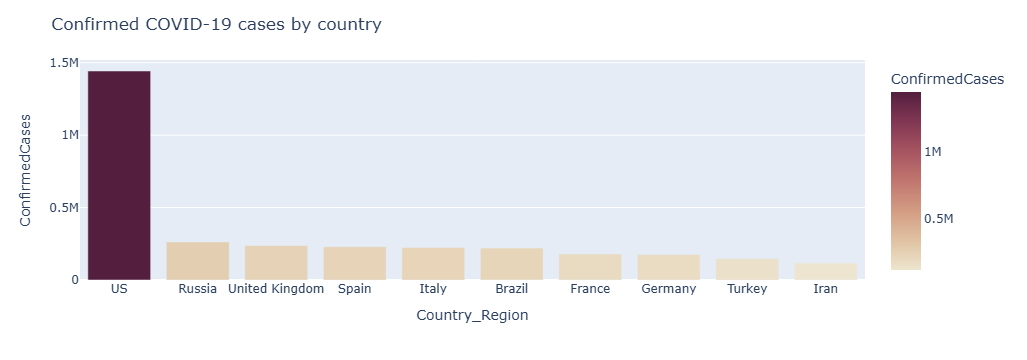

In [74]:
fig = px.bar(top10, x=top10.index, y='ConfirmedCases', labels={'x':'Country'},
             color="ConfirmedCases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases by country')
fig.show()

From the above graph, we can say that US has most Confirmed cases and followed by italy. The virus has began at China but virus is showing a greater impact on US and Italy than China

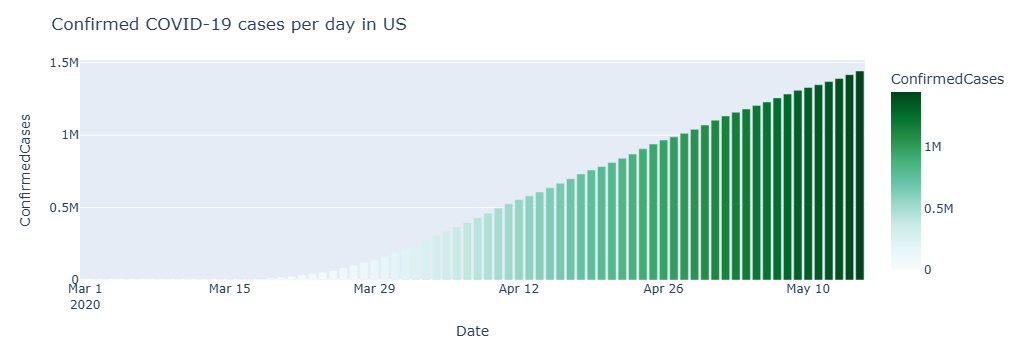

In [75]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'US') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in US')
fig.show()

From this graph we can say that,with in short period of time virus has spread more in US and kept in 1st place

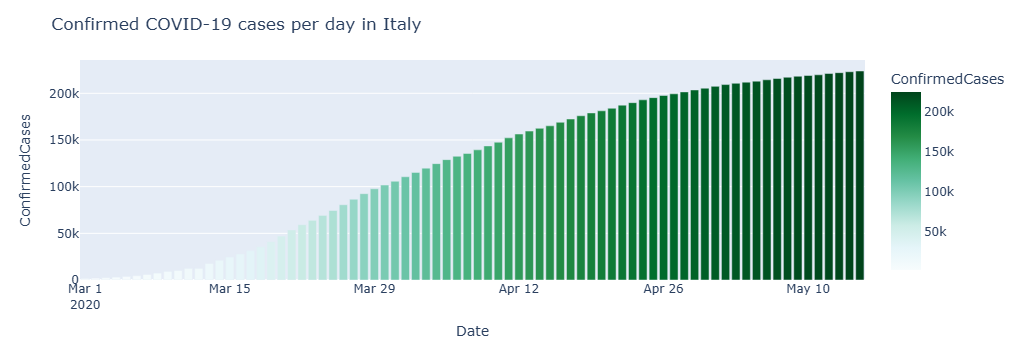

In [76]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Italy')
fig.show()


In Italy, Spreading of virus done for a long time and thus effected more people. But in US within short period the spread is more in this way US had a great impact

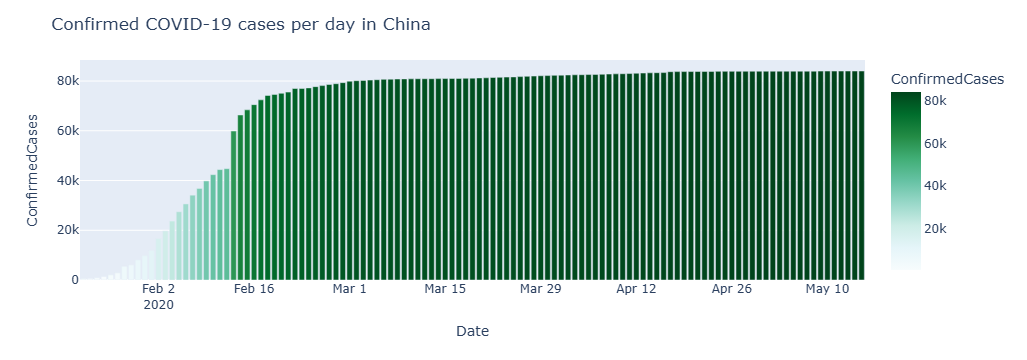

In [77]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in China')
fig.show()

From the above graph, we can say that, In china this virus has started and continued to spread. From this region, virus began to spread all parts of the world. In china the confirmed cases are increasing day by day.

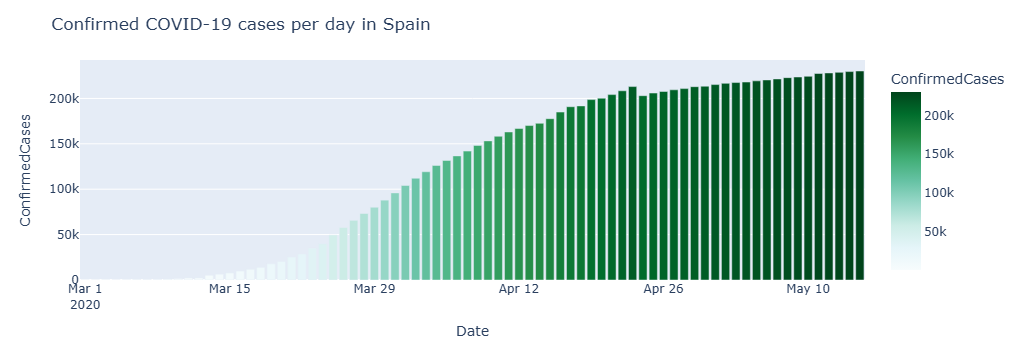

In [78]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Spain')
fig.show()

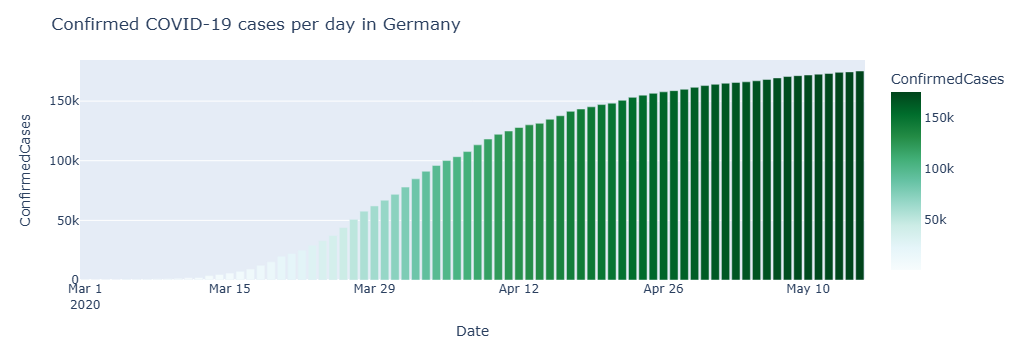

In [79]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in Germany')
fig.show()


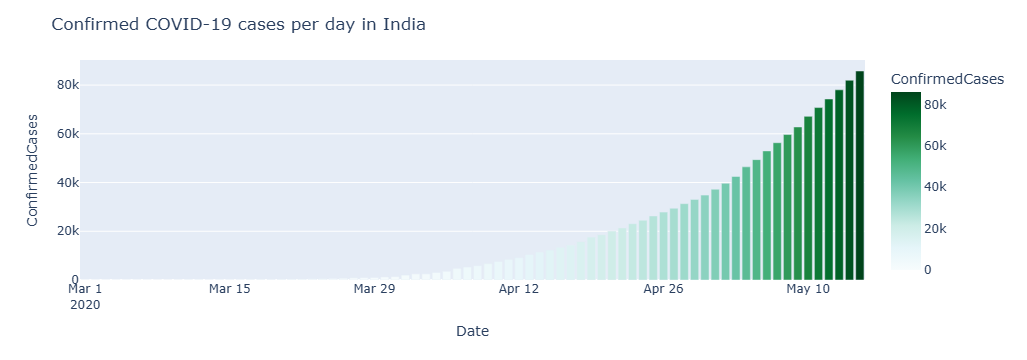

In [80]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases per day in India')
fig.show()

The confirmed Cases compared to US, China, Italy , Spain and Germany are very less in India. But once it starts spreading it will show a greater impact.

In [81]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.tail(5)

,Date,Country_Region,Id,Province_State,ConfirmedCases,Fatalities
21155,2020-05-15,Vietnam,35535,0,314.0,0.0
21156,2020-05-15,West Bank and Gaza,35650,0,375.0,2.0
21157,2020-05-15,Western Sahara,35765,0,6.0,0.0
21158,2020-05-15,Zambia,35880,0,654.0,7.0
21159,2020-05-15,Zimbabwe,35995,0,42.0,4.0


Time Evaluation

In [82]:
def pltCountry_cases(ConfirmedCases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases' )
  

In [83]:
def pltCountry_fatalities(Fatalities,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of fatalities' )

Time Series in China

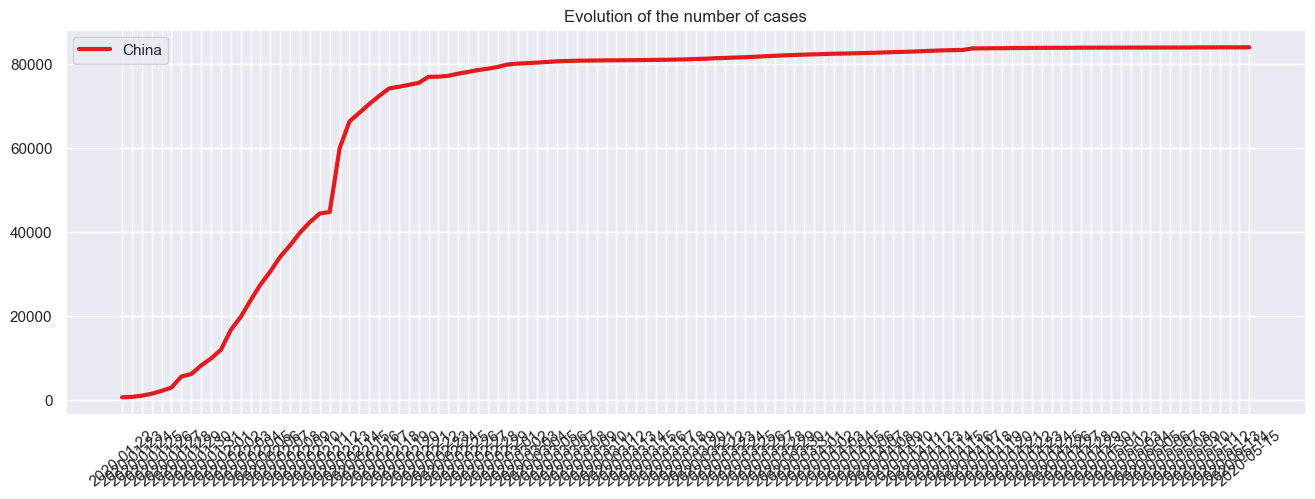

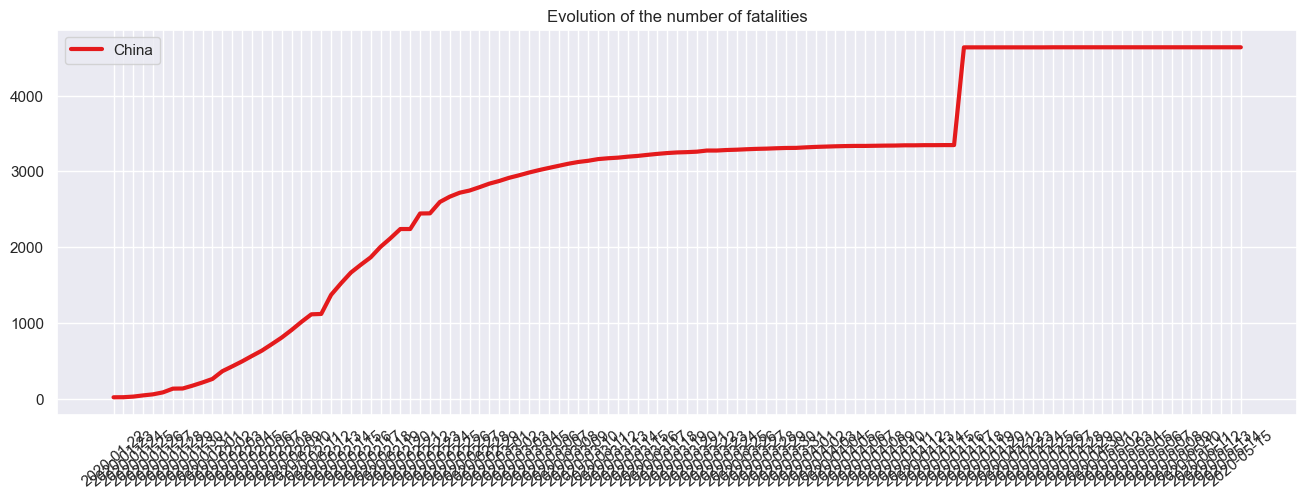

In [84]:
pltCountry_cases('ConfirmedCases','China')
pltCountry_fatalities('Fatalities','China')

Comparing a group of countries with similar evolution: Germany, Spain, France and the US

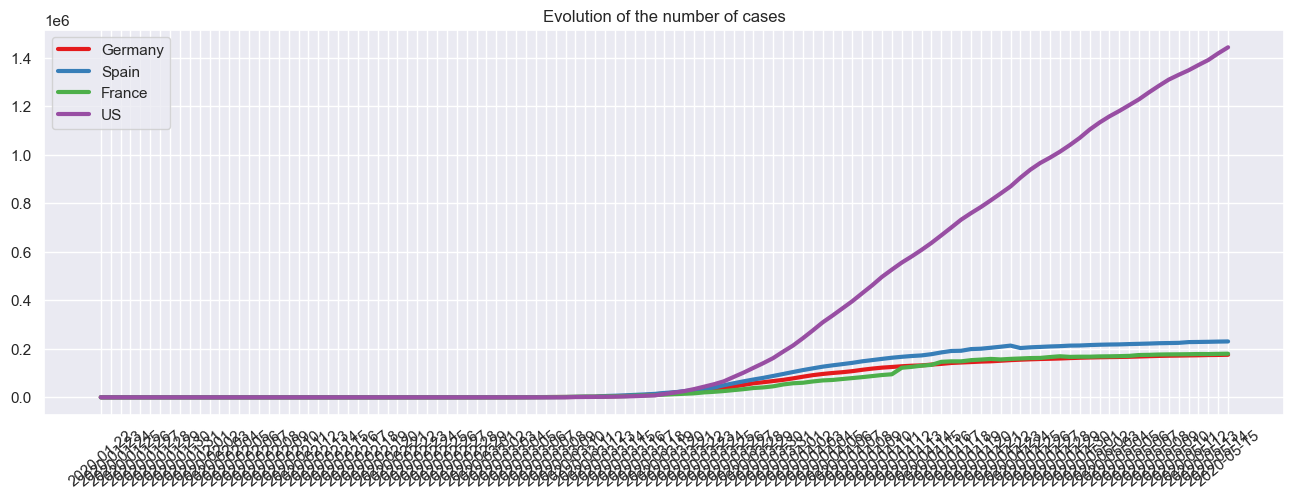

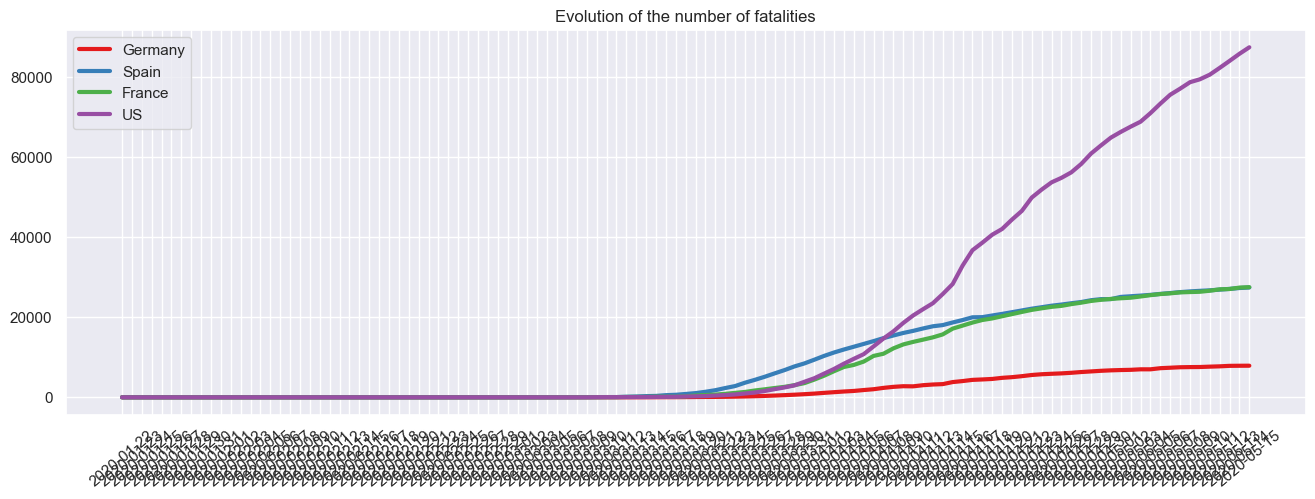

In [85]:
pltCountry_cases('ConfirmedCases', 'Germany','Spain','France','US')
pltCountry_fatalities('Fatilities','Germany','Spain','France','US')

In [86]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [87]:
case='ConfirmedCases'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )

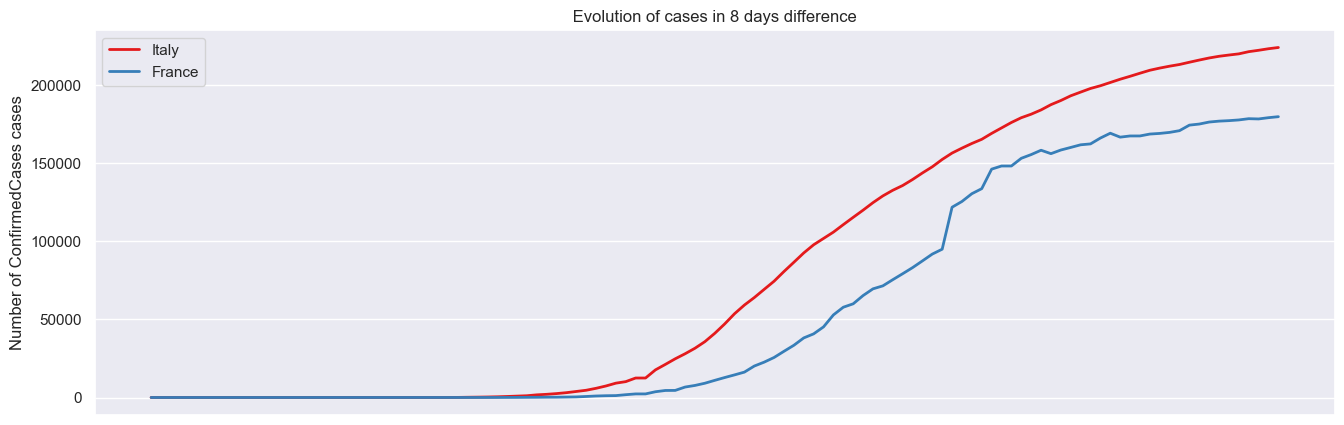

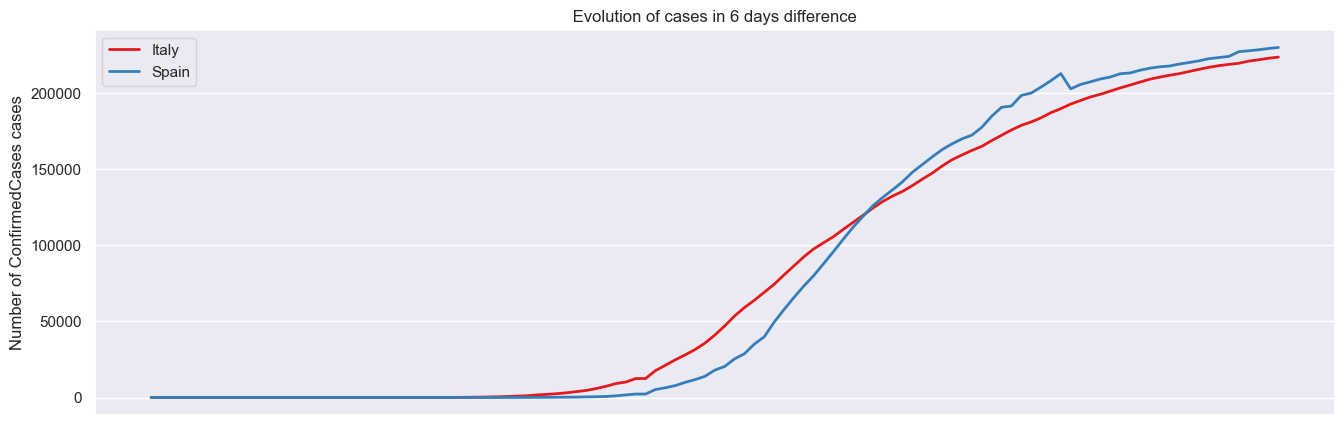

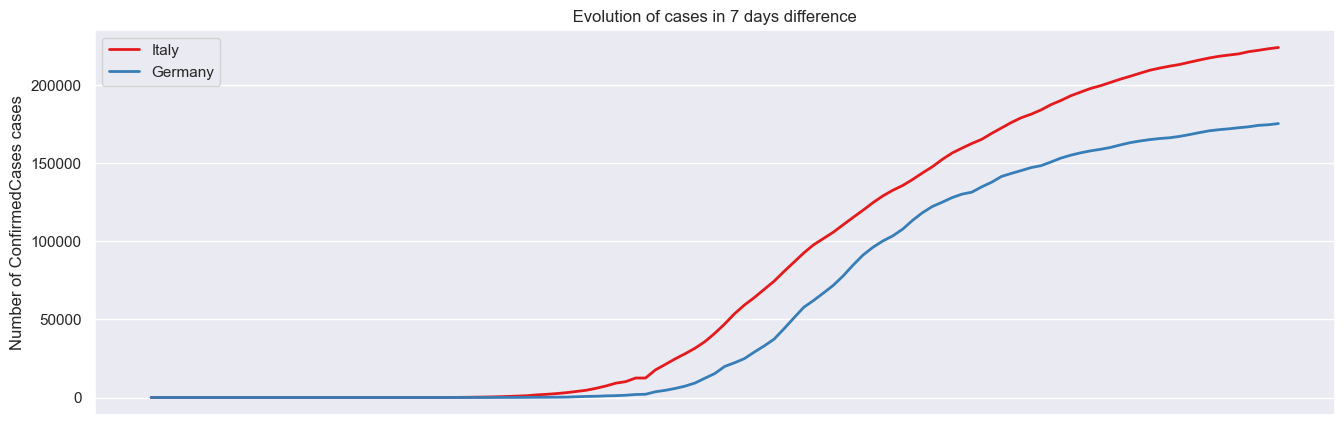

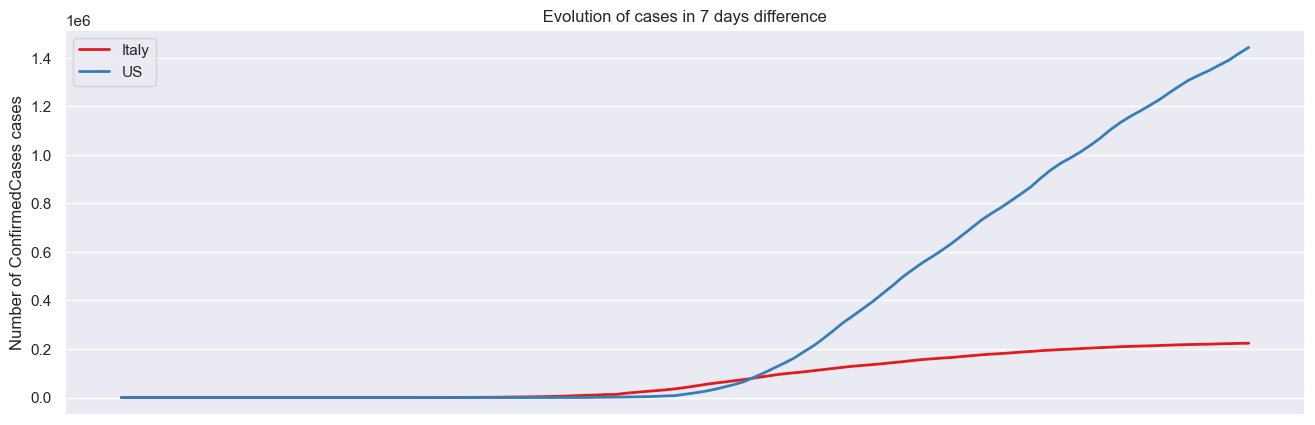

In [88]:
timeCompare(8,'Italy','France')
timeCompare(6,'Italy','Spain')
timeCompare(7,'Italy','Germany')
timeCompare(7,'Italy','US')

From the above graph we can conclude that with 7 days difference, US crossed Italy in Cases

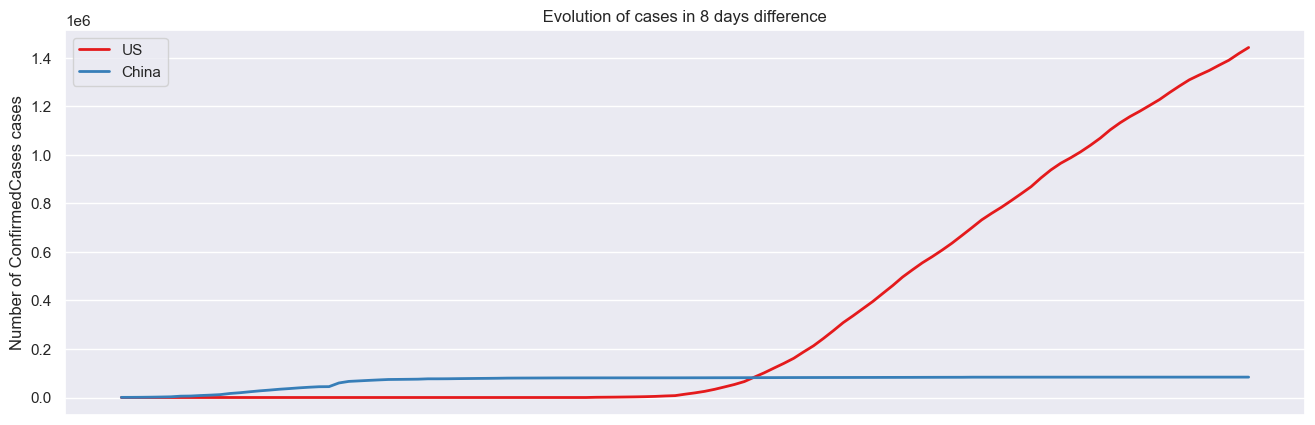

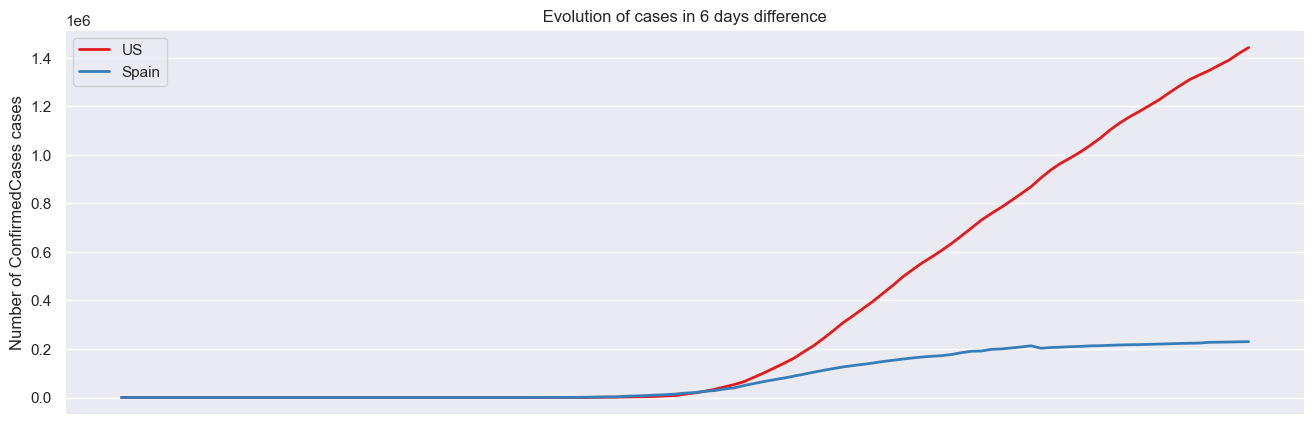

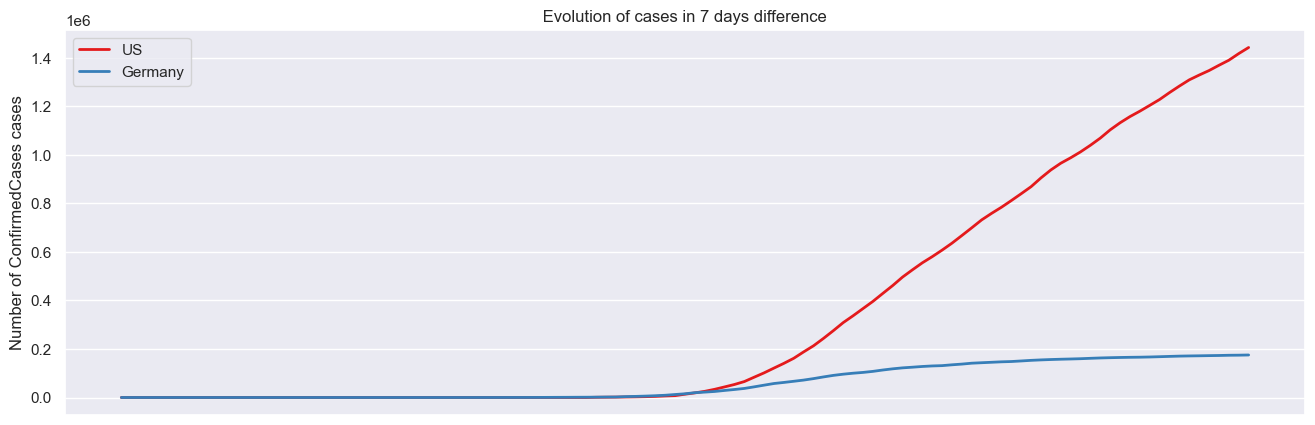

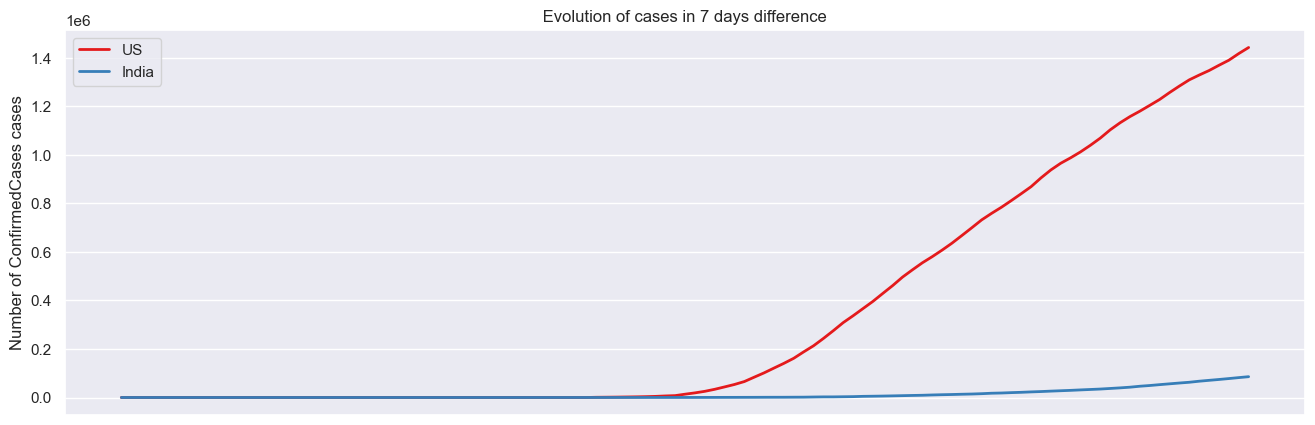

In [89]:
timeCompare(8,'US','China')
timeCompare(6,'US','Spain')
timeCompare(7,'US','Germany')
timeCompare(7,'US','India')

In [90]:
case='Fatalities'
def timeCompare_f(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of Fatalities in %d days difference '%time ,ylabel='Number of %s cases'%case )

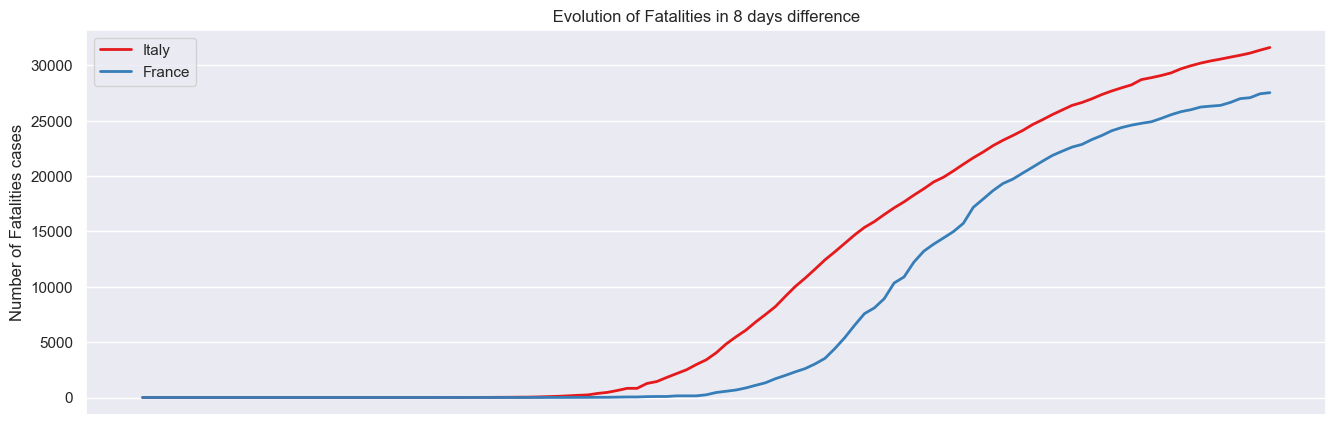

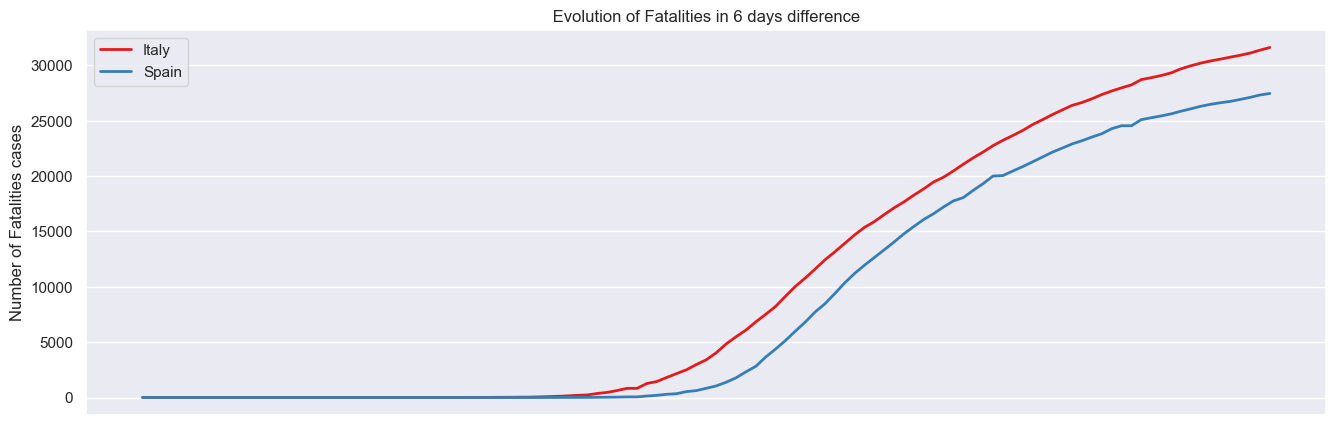

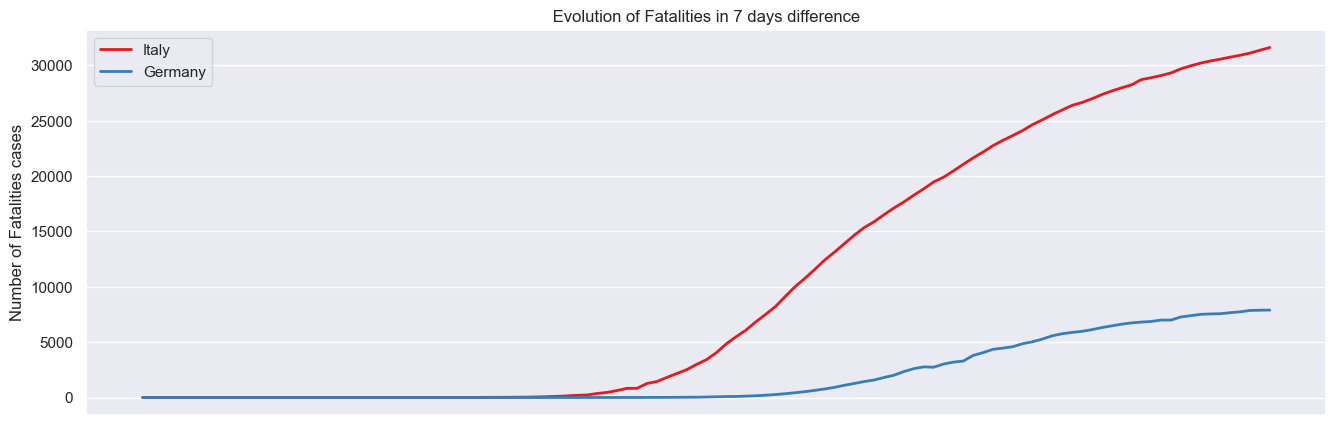

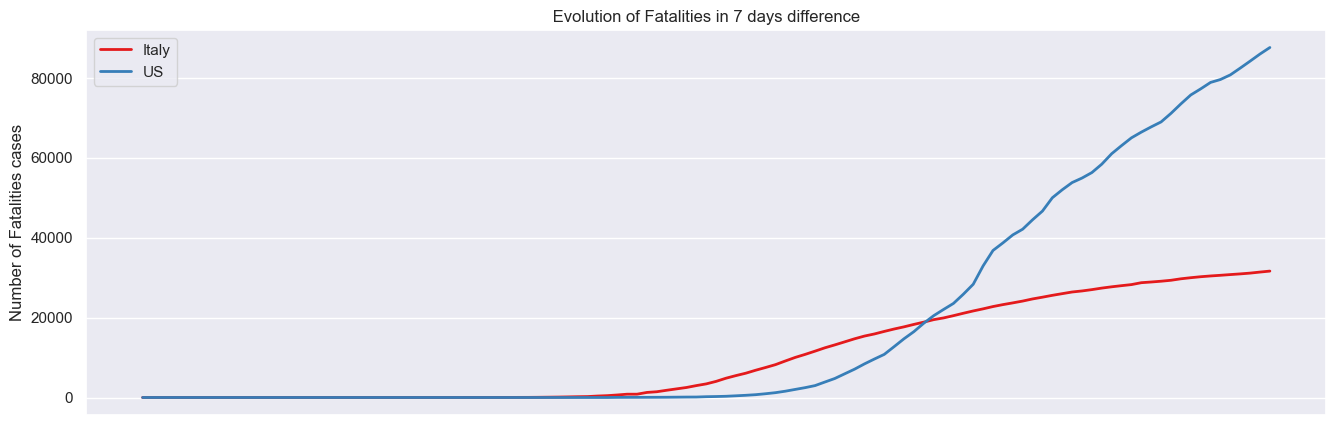

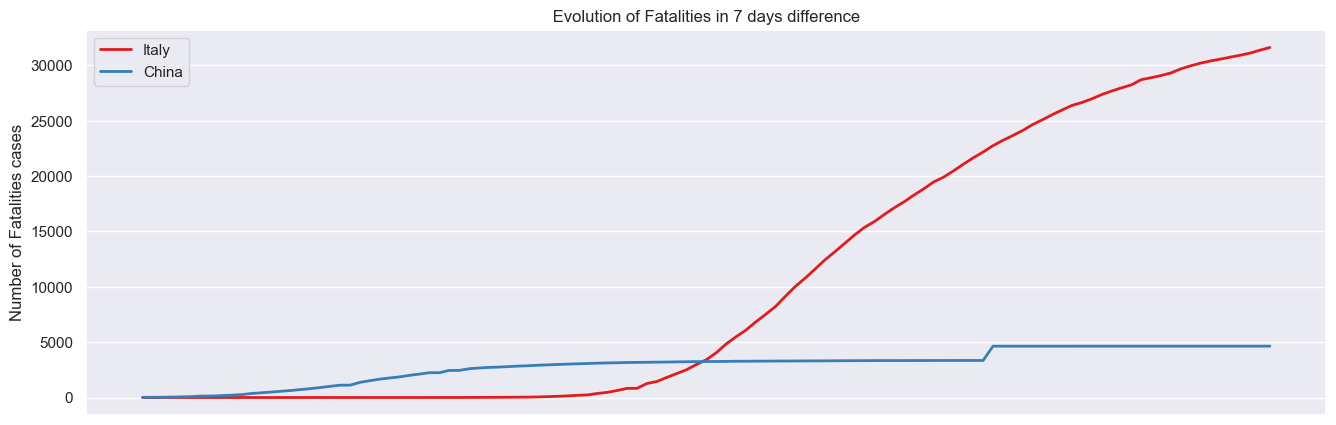

In [91]:
timeCompare_f(8,'Italy','France')
timeCompare_f(6,'Italy','Spain')
timeCompare_f(7,'Italy','Germany')
timeCompare_f(7,'Italy','US')
timeCompare_f(7,'Italy','China')

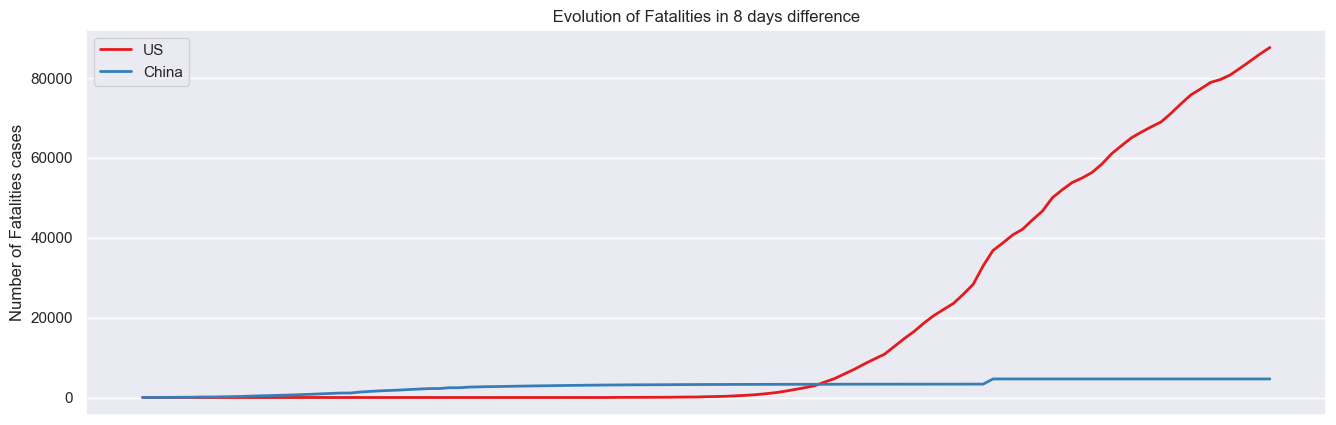

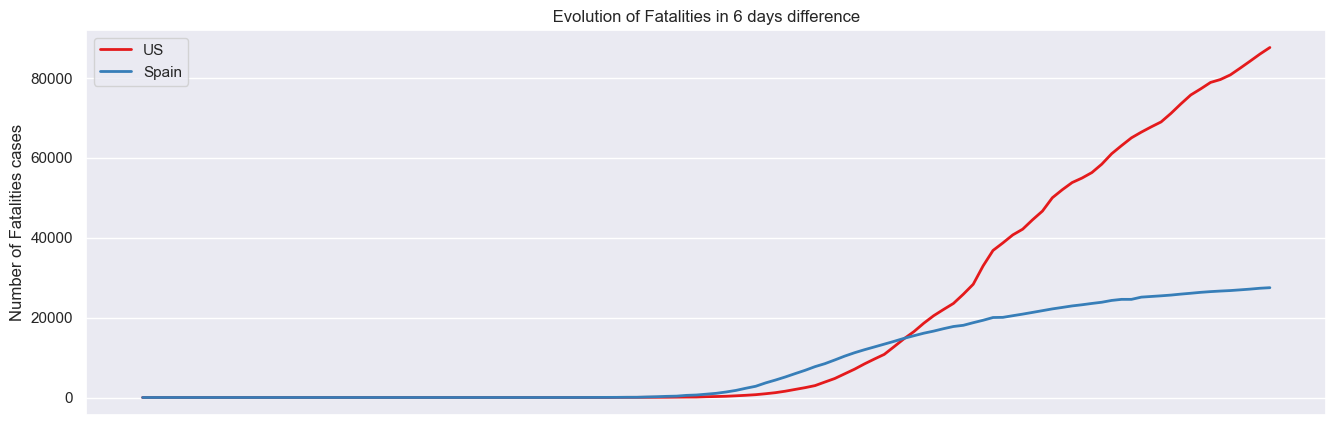

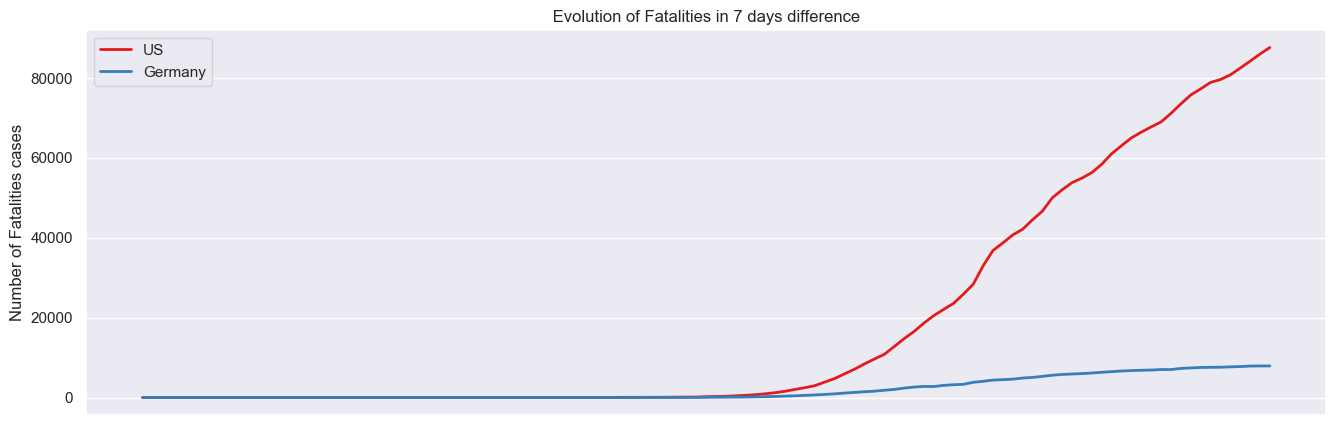

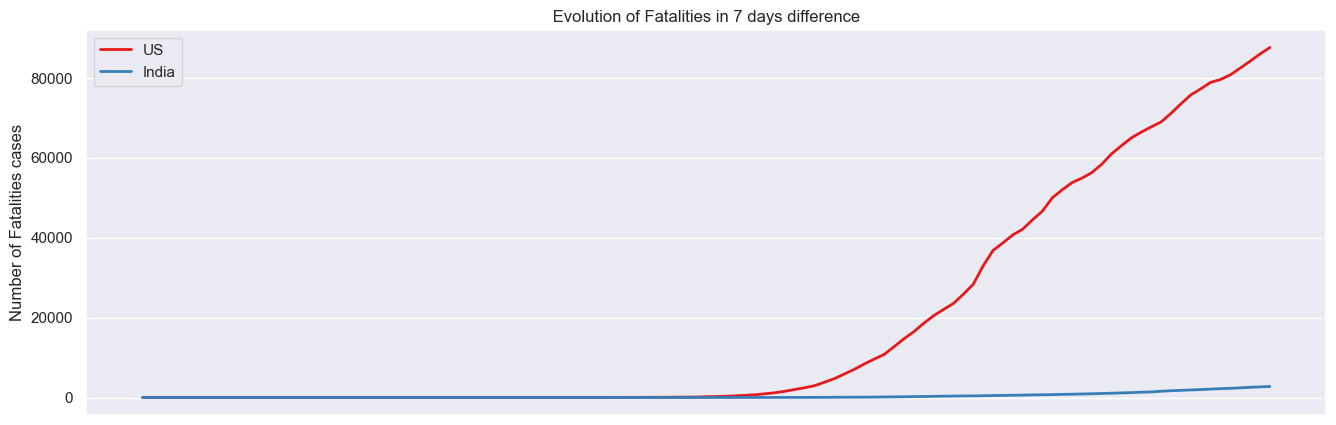

In [92]:
timeCompare_f(8,'US','China')
timeCompare_f(6,'US','Spain')
timeCompare_f(7,'US','Germany')
timeCompare_f(7,'US','India')

ARIMA

Cases Distribution with Rolling mean and standard deviation

In [93]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

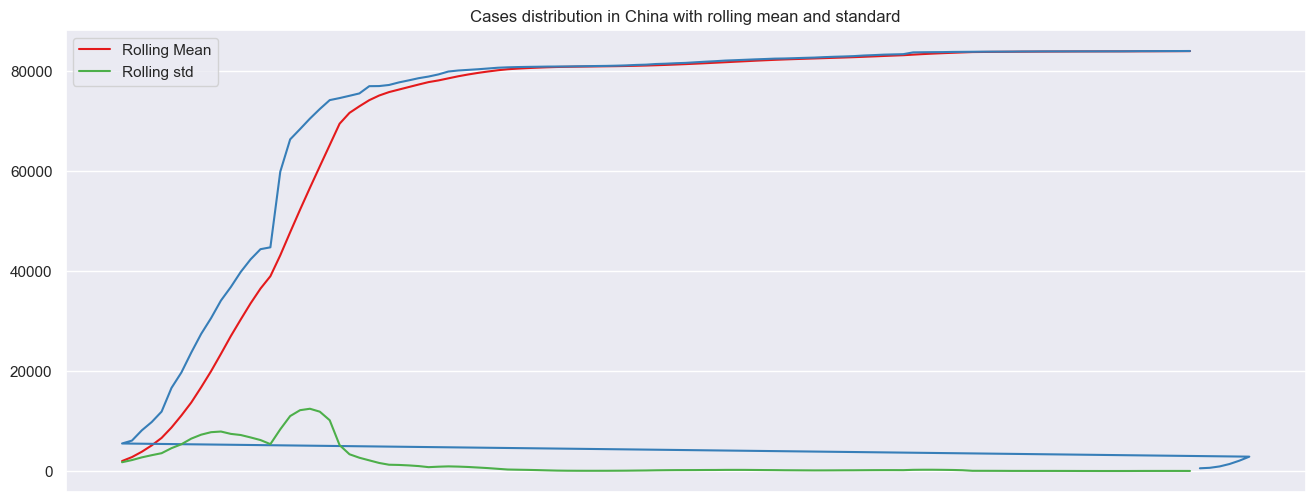

In [94]:
tsC1=roll('China')
rollPlot('China')

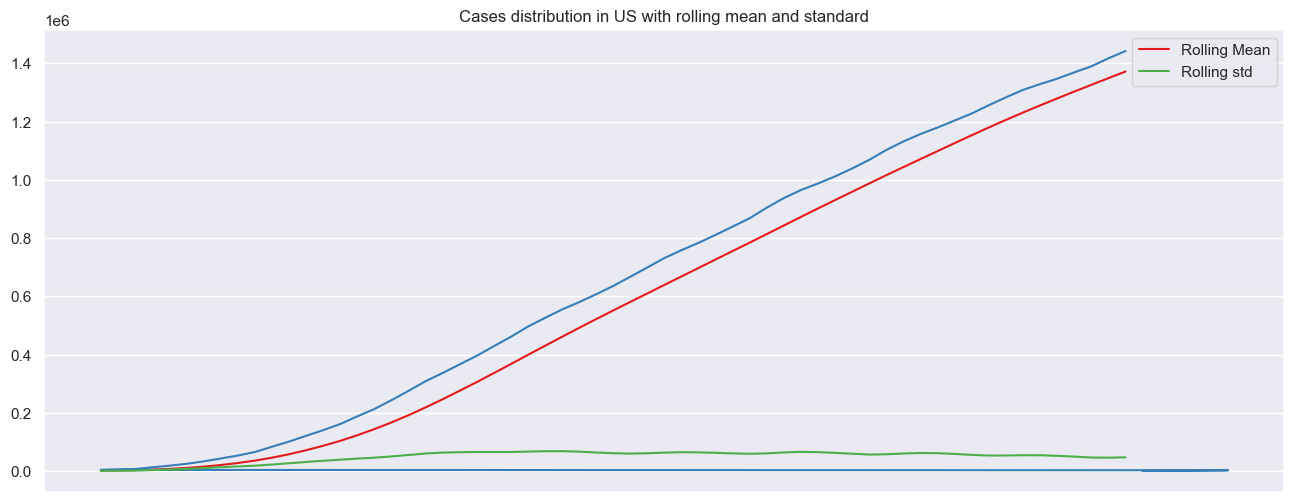

In [95]:
tsC2=roll('US')
rollPlot('US')

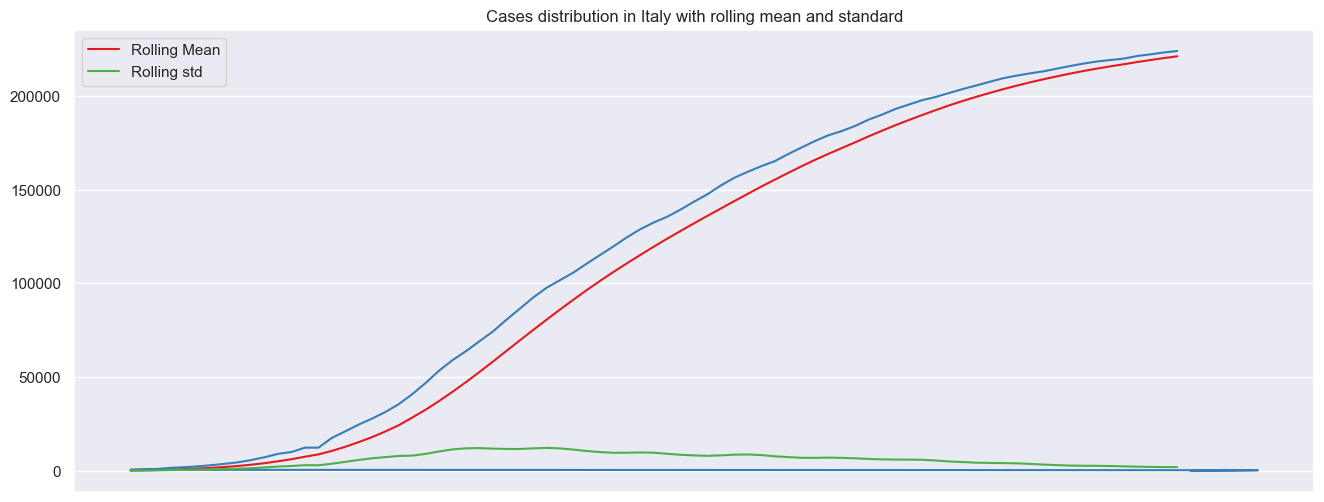

In [96]:
tsC3=roll('Italy')
rollPlot('Italy')

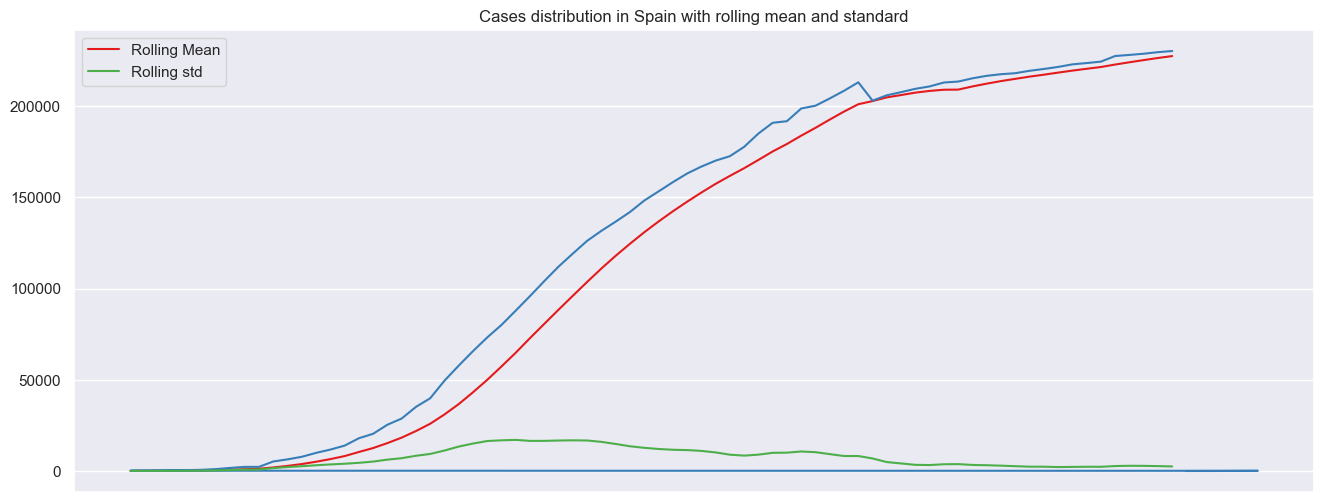

In [97]:
tsC4=roll('Spain')
rollPlot('Spain')

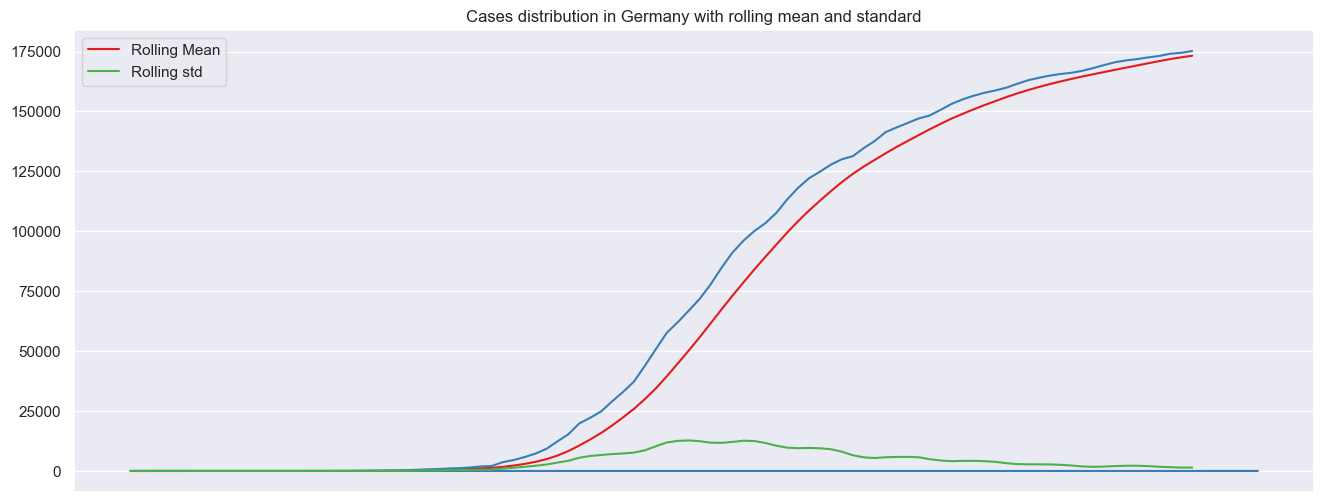

In [98]:
tsC5=roll('Germany')
rollPlot('Germany')

Decomposing the data

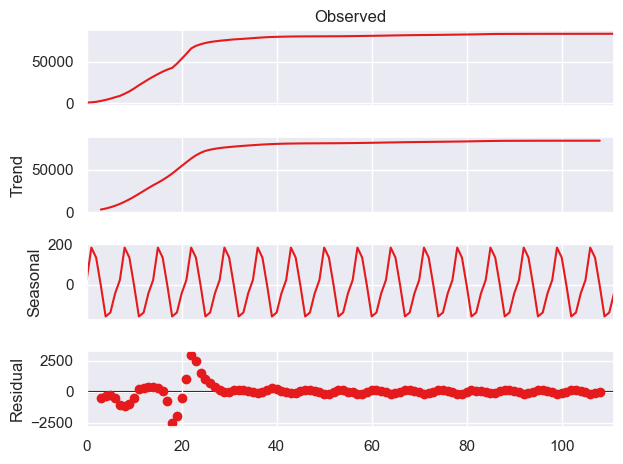

In [99]:
#Decomposing the ts to find its properties
fig=sm.tsa.seasonal_decompose(tsC1.values,period=7).plot()

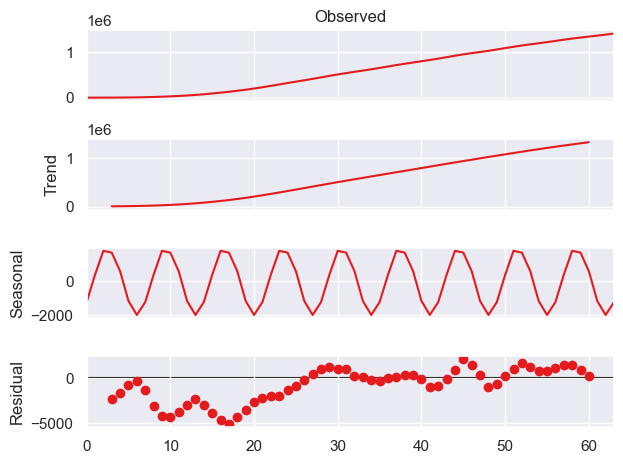

In [100]:
fig=sm.tsa.seasonal_decompose(tsC2.values,period=7).plot()

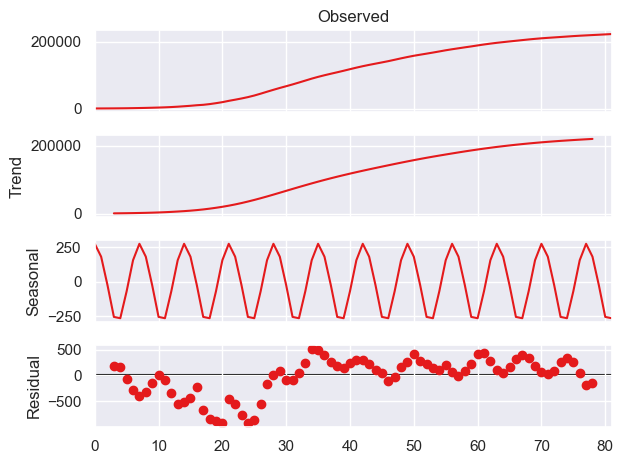

In [101]:
fig=sm.tsa.seasonal_decompose(tsC3.values,period=7).plot()

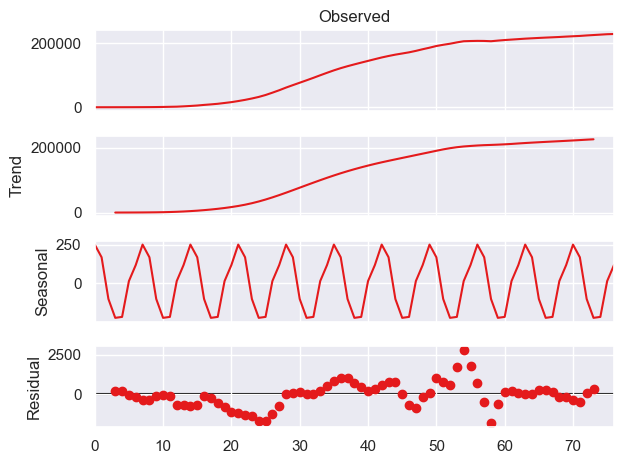

In [102]:
fig=sm.tsa.seasonal_decompose(tsC4.values,period=7).plot()

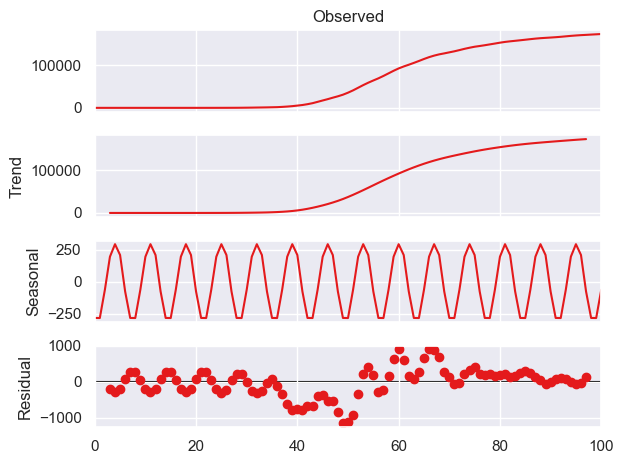

In [103]:
fig=sm.tsa.seasonal_decompose(tsC5.values,period=7).plot()

From the above graph we analysed timeseries of US, Germany, France, italy ,Spain : Trend , Seasonal , Residual of Confirmed Cases are analysed

Data Stationarity and transformation

In [104]:
#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -4.230209
p-value                         0.000585
#Lags Used                     13.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64


In [105]:
#For US
tsC=tsC2['ConfirmedCases'].values
stationarity(tsC)


Results of Dickey-Fuller Test:
Test Statistic                 -0.950660
p-value                         0.770832
#Lags Used                      9.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [106]:
#For Italy
tsC=tsC3['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -1.702558
p-value                         0.429795
#Lags Used                      8.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


In [107]:
#For Spain
tsC=tsC4['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -2.264269
p-value                         0.183751
#Lags Used                      9.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [108]:
#For Germany
tsC=tsC5['ConfirmedCases'].values
stationarity(tsC)

Results of Dickey-Fuller Test:
Test Statistic                 -0.996540
p-value                         0.754524
#Lags Used                     13.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Here the p-value helps us to reject the null hypothesis of the non-stationarity of the data with confidence, but that assumption is sometimes not enough, we should also consider the time series might not be an AR(auto-regression). This supposedly means that the parameter i(d) will be 0 and the model would be an ARMA model.

AUTO Correlation

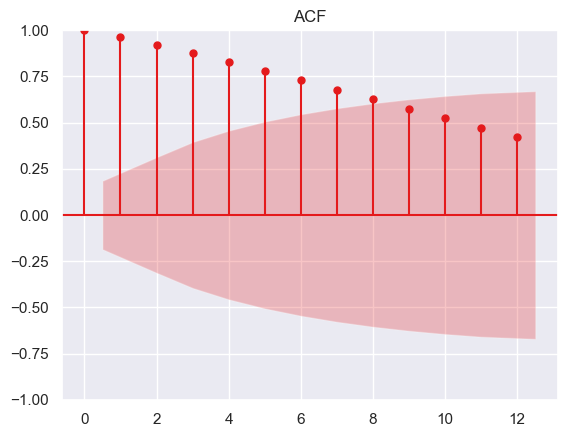

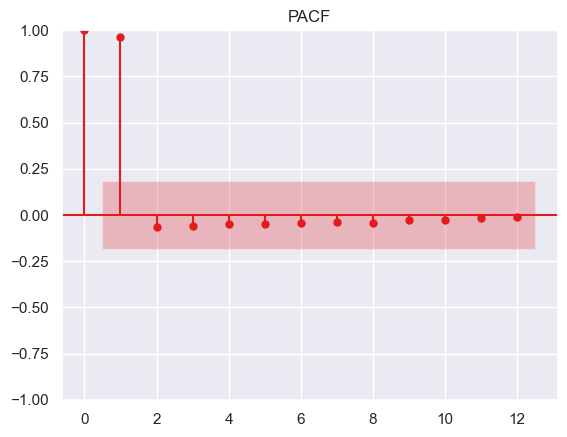

In [109]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

#For China
corr(tsC1)

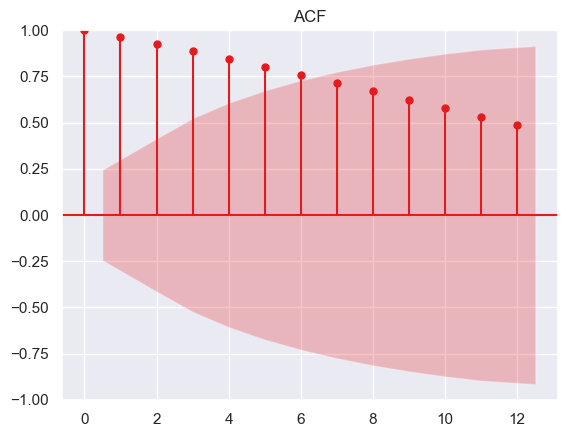

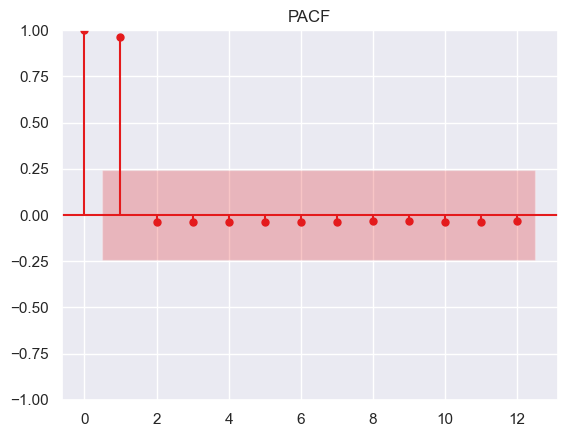

In [110]:
#For US
corr(tsC2)

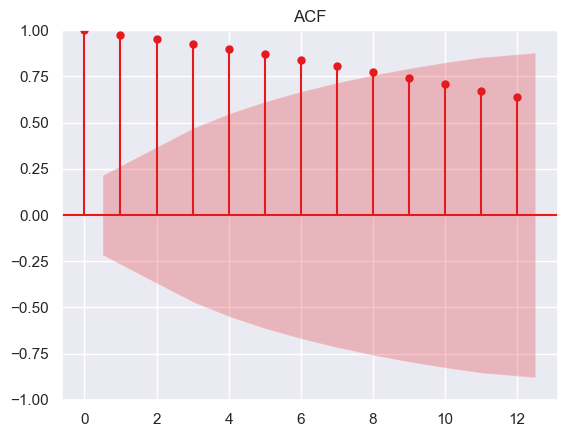

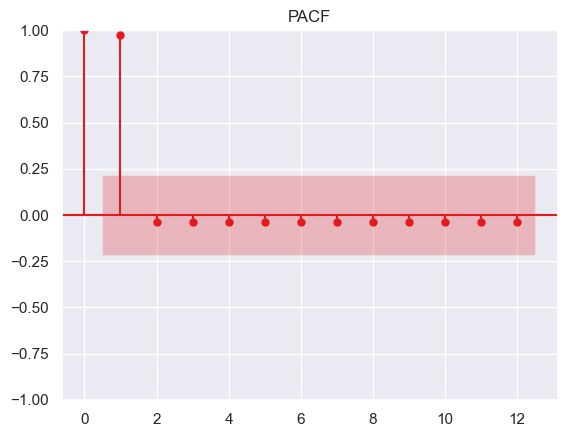

In [111]:
#For Italy
corr(tsC3)

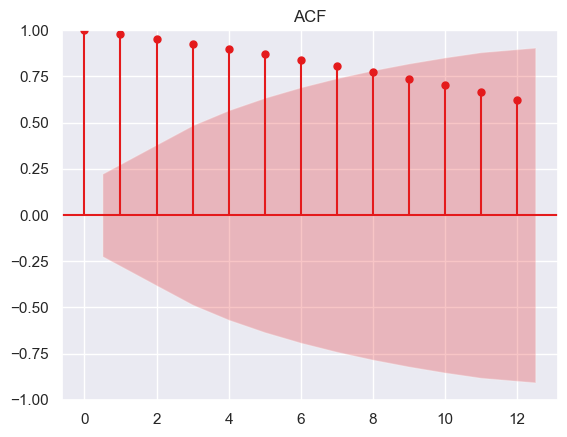

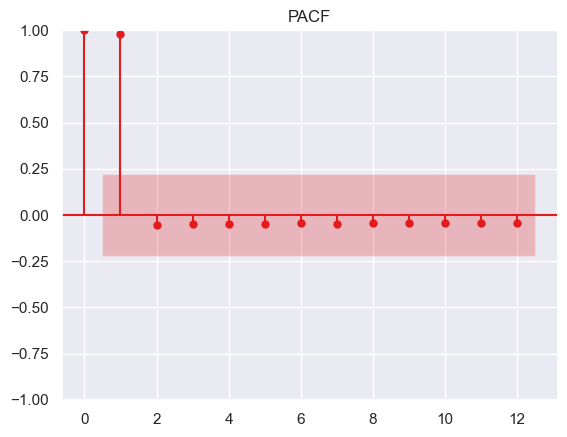

In [112]:
#For Spain
corr(tsC4)

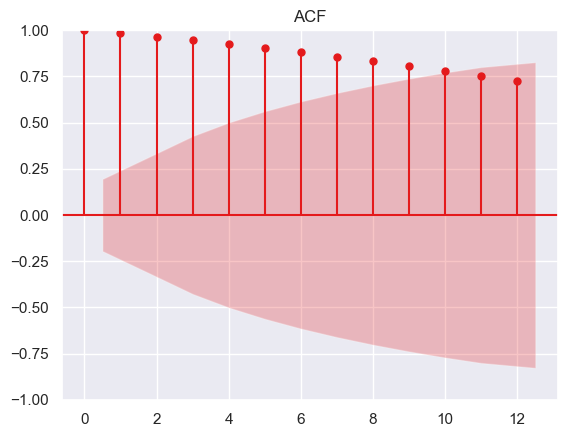

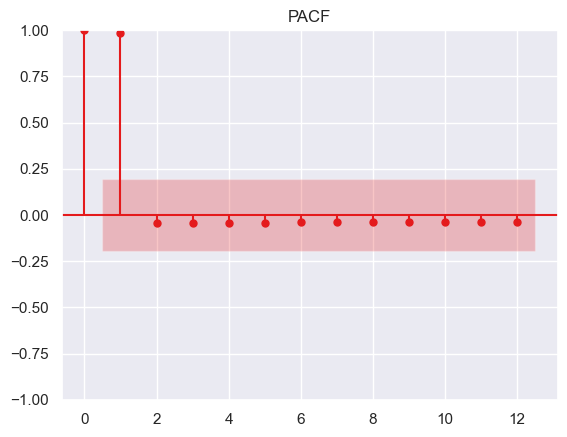

In [113]:
#For Germany
corr(tsC5)

Model Building

In [114]:
#test['Date'] = pd.to_datetime(test['Date'])
#train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [115]:
def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.isocalendar().week
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [55]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   --------- ------------------------------ 2.6/11.2 MB 12.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.2 MB 12.1 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.2 MB 11.1 MB/s eta 0:00:01
   -------------------------------- ------- 9.2/11.2 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 10.4 MB/s  0:00:01

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ---------

In [116]:
train_features=pd.DataFrame(create_features(train))
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

In [117]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 3, 5)   Log Likelihood                -538.233
Date:                Sat, 19 Apr 2025   AIC                           1094.466
Time:                        09:24:47   BIC                           1116.126
Sample:                             0   HQIC                          1103.162
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5418      0.111      4.877      0.000       0.324       0.760
ar.L2         -0.1292      0.110     -1.177      0.239      -0.344       0.086
ar.L3         -0.3738      0.096     -3.913      0.0

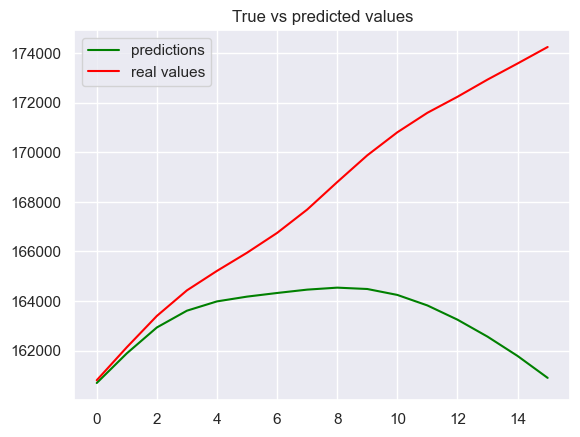

In [126]:
#Mean absolute percentage error
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    #result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred = result.get_forecast(steps=len(test)).predicted_mean
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(3, 3, 5)   Log Likelihood                -538.233
Date:                Sat, 19 Apr 2025   AIC                           1094.466
Time:                        09:26:53   BIC                           1116.126
Sample:                             0   HQIC                          1103.162
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5418      0.111      4.877      0.000       0.324       0.760
ar.L2         -0.1292      0.110     -1.177      0.239      -0.344       0.086
ar.L3         -0.3738      0.096     -3.913      0.0

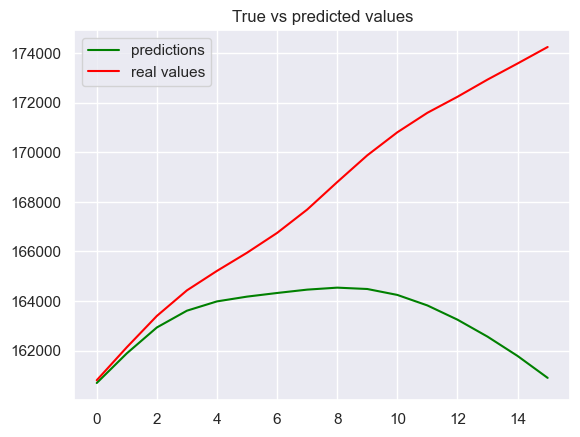

In [127]:
#Mean absolute percentage error
def mape(y2, y_pred): 
    y2, y_pred = np.array(y2), np.array(y_pred)
    return np.mean(np.abs((y2 - y_pred) / y2)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    #result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred = result.get_forecast(steps=len(test)).predicted_mean
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)